In [1]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt

In [4]:
LANDMARKS_PER_FRAME = 543 # Total landmarks in Mediapipe Holistic Model

INPUT_DIR = './kaggle/input/asl-signs'

def read_json_file(json_path):
    with open(json_path, "rb") as f:
        json_data = json.load(f)
    
    return json_data

def load_landmarks(pq_path):
    data_columns = ['x', 'y', 'z']
    
    pq_path = os.path.join(INPUT_DIR, pq_path)
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / LANDMARKS_PER_FRAME)
    data = data.values.reshape(n_frames, LANDMARKS_PER_FRAME, len(data_columns))
    
    return data.astype(np.float32)

In [5]:
training_data_path = os.path.join(INPUT_DIR, 'train.csv')
index_map_path = os.path.join(INPUT_DIR, 'sign_to_prediction_index_map.json')

training_data = pd.read_csv(training_data_path)
index_map = read_json_file(index_map_path)

In [6]:
index_map

{'TV': 0,
 'after': 1,
 'airplane': 2,
 'all': 3,
 'alligator': 4,
 'animal': 5,
 'another': 6,
 'any': 7,
 'apple': 8,
 'arm': 9,
 'aunt': 10,
 'awake': 11,
 'backyard': 12,
 'bad': 13,
 'balloon': 14,
 'bath': 15,
 'because': 16,
 'bed': 17,
 'bedroom': 18,
 'bee': 19,
 'before': 20,
 'beside': 21,
 'better': 22,
 'bird': 23,
 'black': 24,
 'blow': 25,
 'blue': 26,
 'boat': 27,
 'book': 28,
 'boy': 29,
 'brother': 30,
 'brown': 31,
 'bug': 32,
 'bye': 33,
 'callonphone': 34,
 'can': 35,
 'car': 36,
 'carrot': 37,
 'cat': 38,
 'cereal': 39,
 'chair': 40,
 'cheek': 41,
 'child': 42,
 'chin': 43,
 'chocolate': 44,
 'clean': 45,
 'close': 46,
 'closet': 47,
 'cloud': 48,
 'clown': 49,
 'cow': 50,
 'cowboy': 51,
 'cry': 52,
 'cut': 53,
 'cute': 54,
 'dad': 55,
 'dance': 56,
 'dirty': 57,
 'dog': 58,
 'doll': 59,
 'donkey': 60,
 'down': 61,
 'drawer': 62,
 'drink': 63,
 'drop': 64,
 'dry': 65,
 'dryer': 66,
 'duck': 67,
 'ear': 68,
 'elephant': 69,
 'empty': 70,
 'every': 71,
 'eye': 72,
 

In [7]:
training_data.head()

,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie


In [8]:
# add a new column to the dataframe containing numerical values
training_data['index_map'] = training_data['sign'].map(index_map)

In [9]:
training_data.head()

,path,participant_id,sequence_id,sign,index_map
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow,25
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait,232
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud,48
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird,23
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie,164


In [10]:
landmark_paths = training_data['path']

In [11]:
landmarks = load_landmarks(landmark_paths[3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


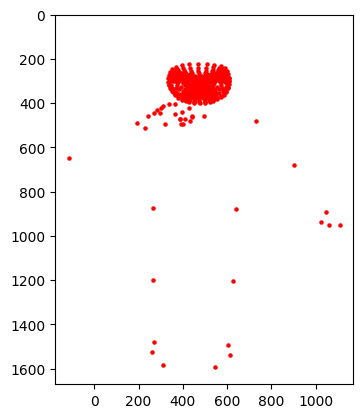

In [12]:
# Load image and detect landmarks
image = np.ones((720, 960,3)) * 255

# Plot landmarks on image
plt.imshow(image)
for i, landmark in enumerate(landmarks[0]):
    x, y = landmark[0], landmark[1]
    plt.scatter(x * image.shape[1], y * image.shape[0], s=5, color='red', marker='o')
    
plt.show()